# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import pickle

---
## Step 0: Load The Data

In [2]:
# Load pickled data
# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

4


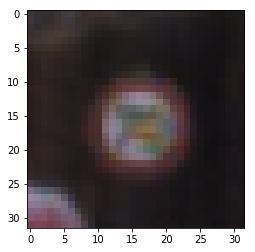

In [4]:
%matplotlib inline
while True:
    index = np.random.randint(0,len(y_train))
    plt.imshow(X_train[index])
    if y_train[index] == 4:
        print(y_train[index])
        break

Text(0.5,1,'Test Set Distribution (Total: 12630)')

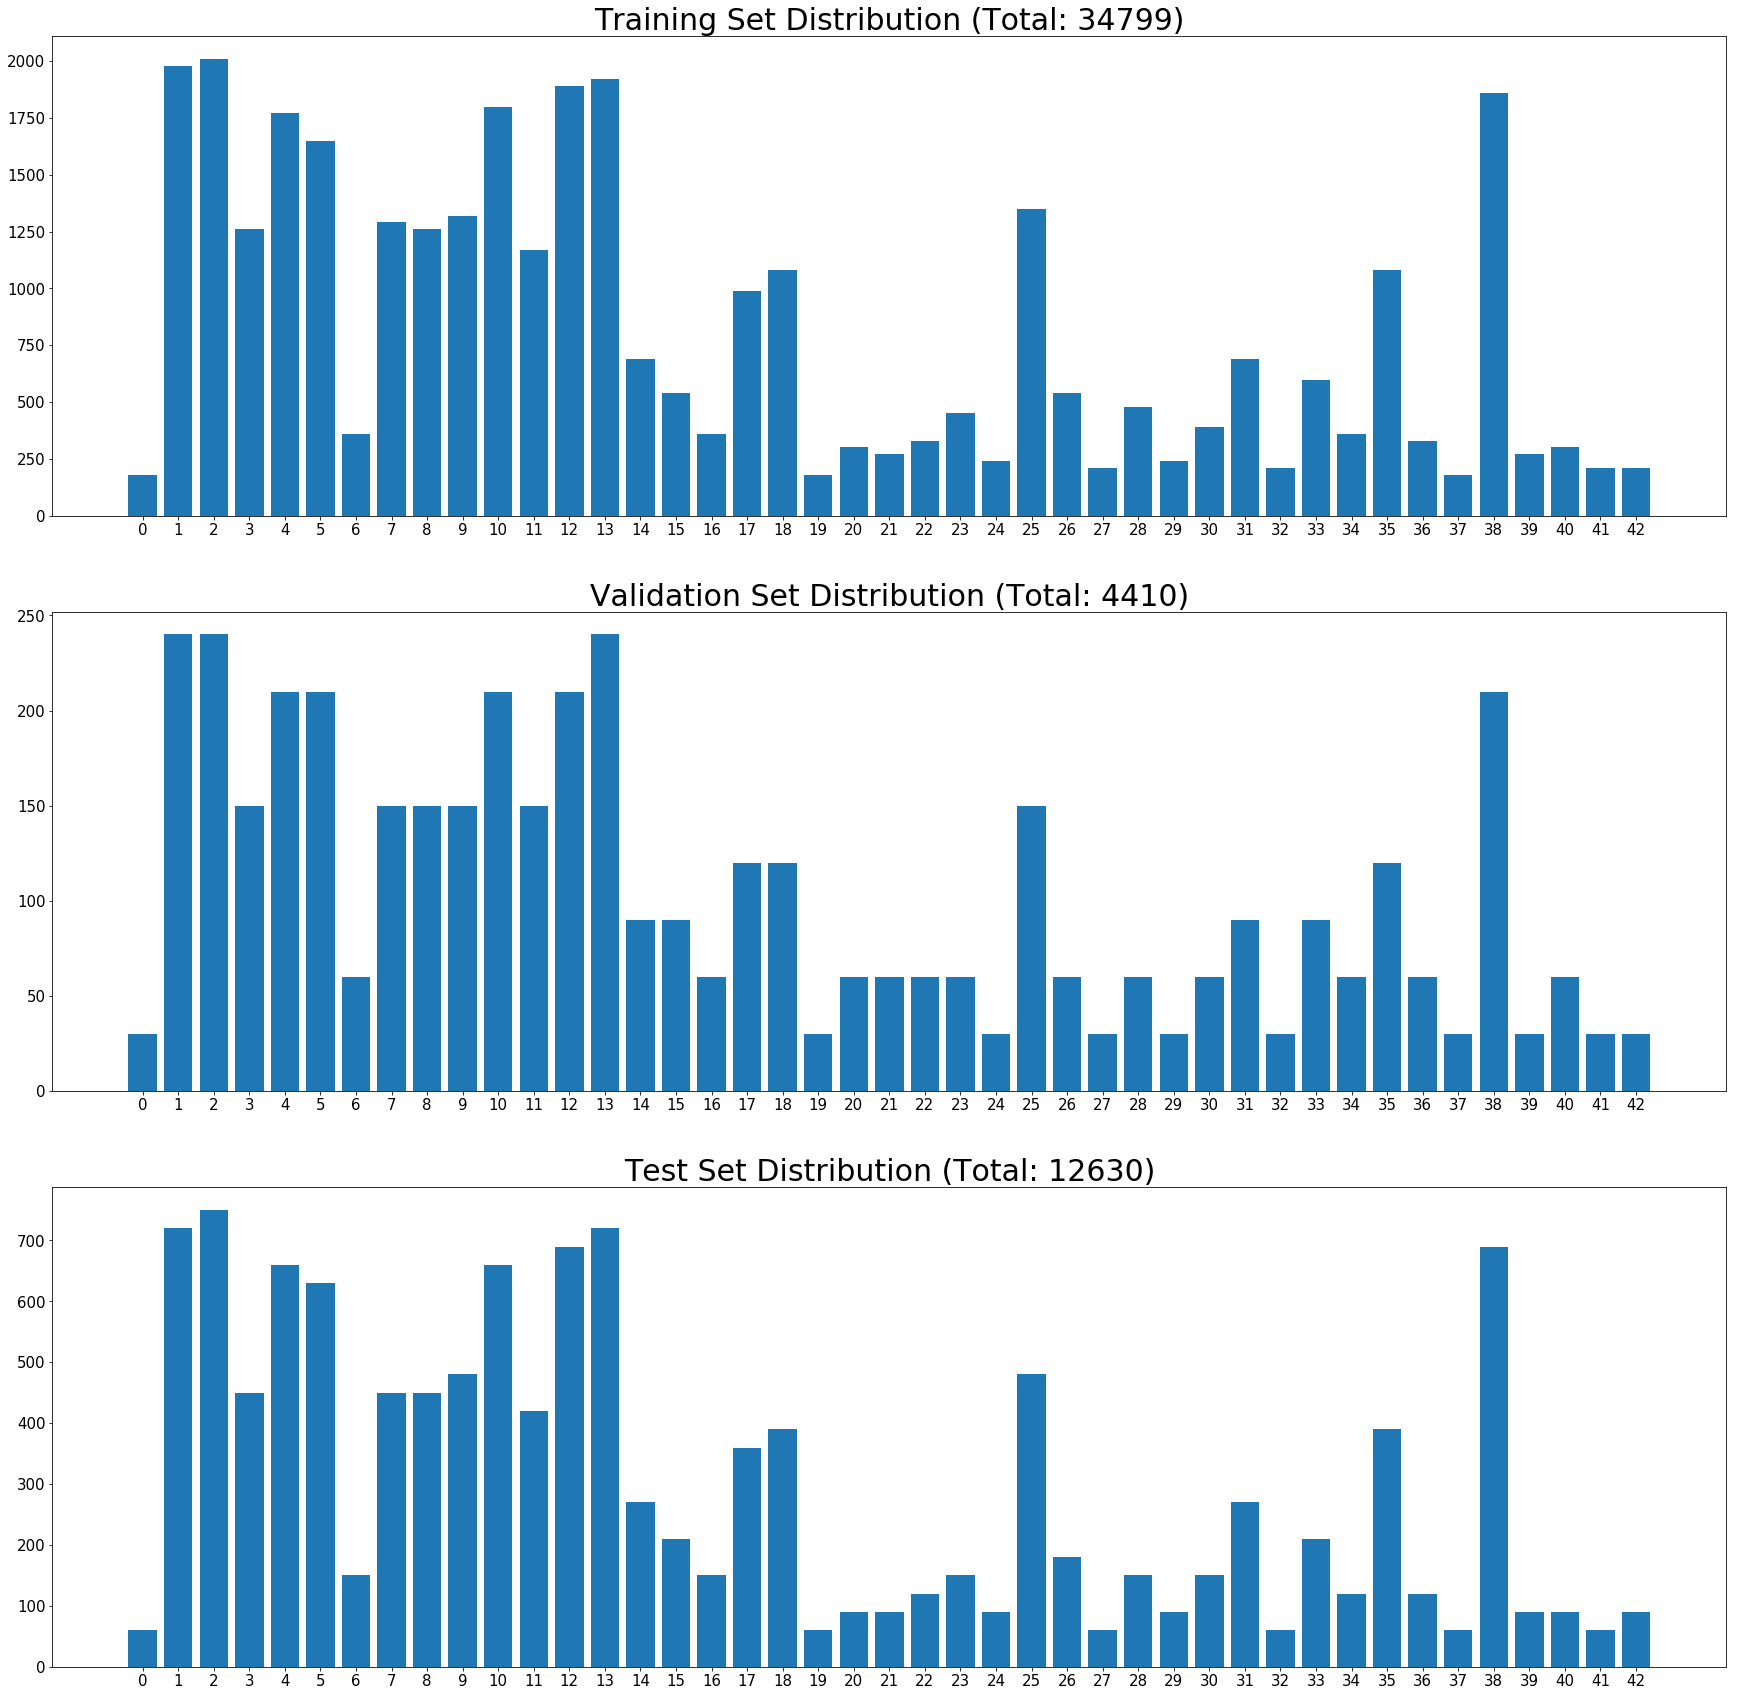

In [5]:
fig = plt.figure(figsize=(30,30))

label_hist_train = np.zeros(43)
for i in range(len(y_train)):
    label_hist_train[y_train[i]] += 1
fig.add_subplot(3,1,1)
plt.bar(range(43), label_hist_train)
plt.xticks(range(43), fontsize=15)
plt.yticks(fontsize=15)
plt.title("Training Set Distribution (Total: {})".format(len(y_train)), fontsize=30)

label_hist_valid = np.zeros(43)
for i in range(len(y_valid)):
    label_hist_valid[y_valid[i]] += 1
fig.add_subplot(3,1,2)
plt.bar(range(43), label_hist_valid)
plt.xticks(range(43), fontsize=15)
plt.yticks(fontsize=15)
plt.title("Validation Set Distribution (Total: {})".format(len(y_valid)), fontsize=30)

label_hist_test = np.zeros(43)
for i in range(len(y_test)):
    label_hist_test[y_test[i]] += 1
fig.add_subplot(3,1,3)
plt.bar(range(43), label_hist_test)
plt.xticks(range(43), fontsize=15)
plt.yticks(fontsize=15)
plt.title("Test Set Distribution (Total: {})".format(len(y_test)), fontsize=30)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [7]:
from sklearn.utils import shuffle
x_train = X_train.astype(np.float32)
x_train = (x_train)/255
x_valid = X_valid.astype(np.float32)
x_valid = (x_valid)/255
x_test = X_test.astype(np.float32)
x_test = (x_test)/255
x_train, y_train = shuffle(x_train, y_train)

### Model Architecture

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [10]:
mu = 0
sigma = 0.1

conv_weights = [
    tf.Variable(tf.truncated_normal([5, 5, 3, 20], mu, sigma), name='conv_weights_0'),
    tf.Variable(tf.truncated_normal([5, 5, 20, 60], mu, sigma), name='conv_weights_1'),
]
conv_bias = [
    tf.Variable(tf.zeros(20), name='conv_bias_0'),
    tf.Variable(tf.zeros(60), name='conv_bias_1')
]

flat_weights = [
    tf.Variable(tf.truncated_normal([1500, 400], mu, sigma), name='flat_weights_0'),
    tf.Variable(tf.truncated_normal([400, 129], mu, sigma), name='flat_weights_1'),
    tf.Variable(tf.truncated_normal([129, 43], mu, sigma), name='flat_weights_2')
]
flat_bias = [
    tf.Variable(tf.zeros(400), name='flat_bias_0'),
    tf.Variable(tf.zeros(129), name='flat_bias_1'),
    tf.Variable(tf.zeros(43), name='flat_bias_2')
]


In [11]:
def LeNet(x):    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x20.
    conv1 = tf.nn.conv2d(x, conv_weights[0], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv_bias[0])
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x20.
    pool1 = tf.nn.max_pool(conv1, strides=[1, 2, 2, 1], ksize=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x60.
    conv2 = tf.nn.conv2d(pool1, conv_weights[1], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv_bias[1])

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x60. Output = 5x5x60.
    pool2 = tf.nn.max_pool(conv2, strides=[1, 2, 2, 1], ksize=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x60. Output = 1500.
    flat2 = flatten(pool2)
    
    # Layer 3: Fully Connected. Input = 1500. Output = 400.
    flat3 = tf.add(tf.matmul(flat2, flat_weights[0]), flat_bias[0])
    
    # Activation.
    flat3 = tf.nn.relu(flat3)

    # Layer 4: Fully Connected. Input = 400. Output = 129.
    flat4 = tf.add(tf.matmul(flat3, flat_weights[1]), flat_bias[1])
    
    # Activation.
    flat4 = tf.nn.relu(flat4)

    # Layer 5: Fully Connected. Input = 129. Output = 43.
    logits = tf.add(tf.matmul(flat4, flat_weights[2]), flat_bias[2])
    return logits

In [12]:
## Validating Architecture
example = tf.constant(x_train[:10])
output_example = LeNet(example)
print(output_example)

Tensor("Add_2:0", shape=(10, 43), dtype=float32)


### Train, Validate and Test the Model

In [13]:
## Parameters
EPOCHS = 60
BATCH_SIZE = 128

In [14]:
## Placeholders for Inputs
img = tf.placeholder(tf.float32, (None, 32, 32, 3), name='img_0')
label = tf.placeholder(tf.int32, (None), name='label_0')
one_hot_label = tf.one_hot(label, 43)

In [15]:
## Training Pipeline
learning_rate = 0.0015
logits = LeNet(img)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_label)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
## Evaluation Pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_label, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
## Evaluation Function
def evaluate(x, y):
    num_samples = x.shape[0]
    d_sess = tf.get_default_session()
    acc_sum = 0
    for batch_start in range(0, num_samples, BATCH_SIZE):
        x_batch, y_batch = x[batch_start:batch_start+BATCH_SIZE], y[batch_start:batch_start+BATCH_SIZE]
        acc = d_sess.run(accuracy_operation, feed_dict={img: x_batch, label: y_batch})
        acc_sum += (acc * len(x_batch))
    final_acc = acc_sum/num_samples
    return final_acc        

In [19]:
## Training Cell
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_samples = x_train.shape[0]
    print('                    Validation       Training')
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        batch_count = 0
        for batch_start_idx in range(0, total_samples, BATCH_SIZE):
            batch_count += 1
            batch_end_idx = batch_start_idx + BATCH_SIZE
            img_batch = x_train[batch_start_idx : batch_end_idx]
            label_batch = y_train[batch_start_idx : batch_end_idx]
            sess.run(training_operation, feed_dict={img: img_batch, label: label_batch})
        accuracy = evaluate(x_valid, y_valid)
        self_acc = evaluate(x_train[0:len(x_valid)], y_train[0:len(x_valid)])
        print('Accuracy of Epoch-{}: {}% ......... {}%'.format(i+1, round(accuracy*100,2), round(self_acc*100,2)))
    saver.save(sess, 'Learned Model/final_learned_model_trial_4')

                    Validation       Training
Accuracy of Epoch-1: 88.48% ......... 95.76%
Accuracy of Epoch-2: 91.61% ......... 97.41%
Accuracy of Epoch-3: 92.52% ......... 99.16%
Accuracy of Epoch-4: 94.67% ......... 99.48%
Accuracy of Epoch-5: 92.31% ......... 99.27%
Accuracy of Epoch-6: 94.92% ......... 99.52%
Accuracy of Epoch-7: 92.79% ......... 99.05%
Accuracy of Epoch-8: 95.28% ......... 99.71%
Accuracy of Epoch-9: 94.22% ......... 99.32%
Accuracy of Epoch-10: 93.65% ......... 99.82%
Accuracy of Epoch-11: 95.06% ......... 99.82%
Accuracy of Epoch-12: 94.4% ......... 99.43%
Accuracy of Epoch-13: 94.56% ......... 99.59%
Accuracy of Epoch-14: 94.69% ......... 99.3%
Accuracy of Epoch-15: 95.9% ......... 99.89%
Accuracy of Epoch-16: 95.74% ......... 99.95%
Accuracy of Epoch-17: 94.81% ......... 99.37%
Accuracy of Epoch-18: 93.95% ......... 99.84%
Accuracy of Epoch-19: 94.54% ......... 99.77%
Accuracy of Epoch-20: 94.85% ......... 99.71%
Accuracy of Epoch-21: 94.4% ......... 99.68%
A

In [22]:
## Evaluation Cell
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, 'Learned Model/final_learned_model')
    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {}%".format(round((test_accuracy*100), 2)))

INFO:tensorflow:Restoring parameters from Learned Model/final_learned_model
Test Accuracy = 95.73%


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

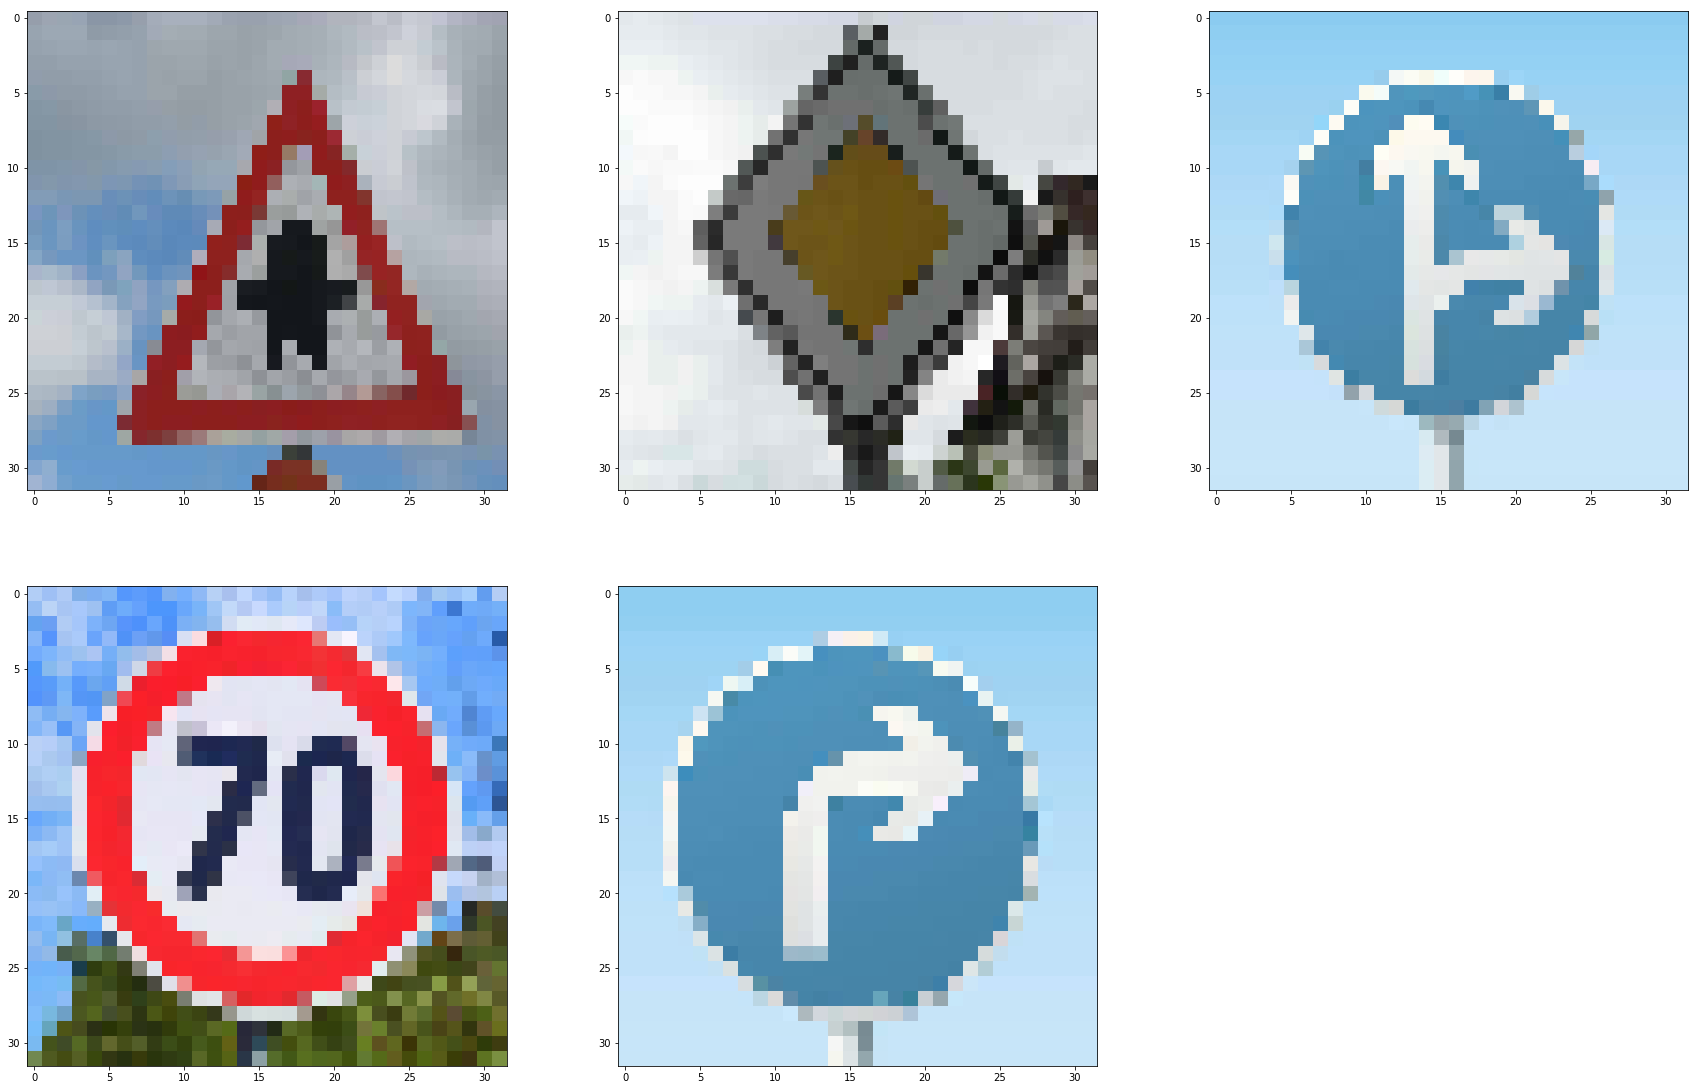

In [23]:
import cv2

I = []
fig = plt.figure(figsize=(30,30))
for idx in range(5):
    I.append(mpimg.imread('Downloaded Traffic Signs/processed_img_{}.png'.format(idx+1))[:,:,:3])
    fig.add_subplot(3,3,idx+1)
    plt.imshow(I[idx])

IStack = np.stack((I[0], I[1], I[2], I[3], I[4]))
ILabels = np.array([11, 12, 36, 4, 33])

### Predict the Sign Type for Each Image

### Analyze Performance

In [24]:
saver = tf.train.Saver()
with tf.Session() as sess1:
    saver.restore(sess1, 'Learned Model/final_learned_model')
    test_accuracy = evaluate(IStack, ILabels)
    lenet_output = LeNet(IStack)
    output_label = tf.argmax(lenet_output, 1)
    print('Actual Labels:', ILabels)
    print('Predicted Labels:', output_label.eval())
    print("Test Accuracy = {}%".format(round((test_accuracy*100), 2)))

INFO:tensorflow:Restoring parameters from Learned Model/final_learned_model
Actual Labels: [11 12 36  4 33]
Predicted Labels: [11 12 36  4 33]
Test Accuracy = 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [25]:
with tf.Session() as sess2:
    saver.restore(sess2, 'Learned Model/final_learned_model')
    print()
    lenet_output = LeNet(IStack)
    sm_probs = tf.nn.softmax(lenet_output).eval()
    most_prob_cls = (np.argsort(sm_probs)[:,::-1])
    for idx in range(len(IStack)):
        top5_cls = most_prob_cls[idx][:5]
        print('Image-{}:'.format(idx+1))
        print('Top Softmax Probabilities:', sm_probs[idx][top5_cls])
        print('Most Probable Classes:', top5_cls)
        print()

INFO:tensorflow:Restoring parameters from Learned Model/final_learned_model

Image-1:
Top Softmax Probabilities: [  1.00000000e+00   8.71567646e-37   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
Most Probable Classes: [11 16 42 10 18]

Image-2:
Top Softmax Probabilities: [ 1.  0.  0.  0.  0.]
Most Probable Classes: [12 42 10 18 17]

Image-3:
Top Softmax Probabilities: [ 1.  0.  0.  0.  0.]
Most Probable Classes: [36 42 10 18 17]

Image-4:
Top Softmax Probabilities: [  1.00000000e+00   1.81957927e-24   2.09522159e-28   5.55926154e-38
   0.00000000e+00]
Most Probable Classes: [ 4 18  1 25 42]

Image-5:
Top Softmax Probabilities: [ 1.  0.  0.  0.  0.]
Most Probable Classes: [33 42 10 18 17]

